<a href="https://colab.research.google.com/github/alexandreIFB/projects_colabority/blob/master/P2BioInformatica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 - Crie um programa que receba do usuário uma sequência de DNA e calcule o seu conteúdo GC:

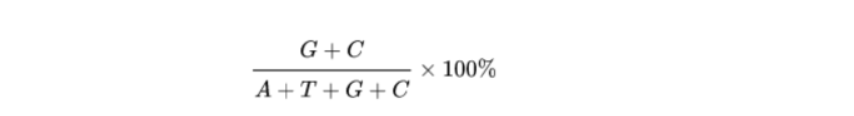

Onde G é a quantidade de guaninas em uma sequência, C é a quantidade de
citosinas, A é a quantidade de adeninas e T a quantidade de timinas.

In [1]:
from collections import Counter

sequencia = input('Insira a seqencia :')

counter = Counter({"g": 0, "c": 0, "a": 0, "t": 0})

counter.update(sequencia)

result = (counter['g'] + counter['c'])/(counter['a']+counter['t']+counter['g']+counter['c'])

print('{:.0f}'.format(result*100) + '%')

Insira a seqencia :cccgggaaat
60%


#2 Crie um programa que receba do usuário uma sequência de DNA e retorne a quantidade de possíveis substrings de tamanho 4 (sem repetições).

Ex.: Entrada: actgactgggggaaa

Após a varredura de toda a sequência achamos as substrings actg, ctga,
tgac, gact, ctgg, tggg, gggg, ggga, ggaa, gaaa, logo a saída do programa deve ser:

In [5]:
word = input("Entrada:")

i = 0
subStrings = []
while(len(word) > i):
  if i + 3 < len(word):
    subStrings.append(word[i:(i+4)])
  i = i + 1
del i
subStrings = list(set(subStrings))
print(subStrings)
print(len(subStrings))

Entrada:actgactgggggaaa
['gact', 'ggaa', 'ctgg', 'gggg', 'gaaa', 'ctga', 'tgac', 'ggga', 'tggg', 'actg']
10


#3 O arquivo `toxinsNCBI.fna` contém 22 sequências genômicas de mRNAs que codificam toxinas em bactérias. Essas sequências residem na fita codificadora (5’ → 3’).

a) Crie um script python, que recebe o arquivo `toxinsNCBI.fna` e retorna
um arquivo `toxins_3-5.fna` que contém a sequência da fita molde 3’ → 5’ (lembre-se que a sequência deve ser salva na direção 5’ → 3’).

In [3]:
def inverter(txt):
  return txt[::-1]

#Leitura de um Arquivo
filename = "/content/toxinsNCBI.fna"
filenameWrite = 'toxins_3-5.fna'


dictSeqs = {}

with open(filename) as fp:
    for linha in fp:
      if(linha[0] == '>'):
        header = linha.rstrip()
        dictSeqs[header] = ''
      else:
        linha.rstrip()
        dictSeqs[header] = dictSeqs[header] + linha.replace('\n','')


#print(dictSeqs['>lcl|M36957.1_cds_AAA22862.1_1 [protein_id=AAA22862.1] [location=565..1677] [gbkey=CDS]'])
for i in dictSeqs.keys():
  fitaMolde = ''
  for letra in dictSeqs[i]:
    if letra == 'A':
      fitaMolde += 'T'
    if letra == 'T':
      fitaMolde += 'A'
    if letra == 'G':
      fitaMolde += 'C'
    if letra == 'C':
      fitaMolde += 'G'
  dictSeqs[i] = inverter(fitaMolde)
  with open(filenameWrite, 'a') as writer:
      writer.write(i+'\n'+dictSeqs[i]+'\n')




b) Agora crie um script que recebe `toxins_3-5.fna` e transforma as
sequências genômicas em sequências de mRNA (na direção 5’-3’) que
devem ser salvas no arquivo `mRNA_toxins.fna`.

In [4]:
def inverter(txt):
  return txt[::-1]

#Leitura de um Arquivo
filename = "/content/toxins_3-5.fna"
filenameWrite = 'mRNA_toxins.fna'


dictSeqs = {}

with open(filename) as fp:
    for linha in fp:
      if(linha[0] == '>'):
        header = linha.rstrip()
        dictSeqs[header] = ''
      else:
        linha.rstrip()
        dictSeqs[header] = dictSeqs[header] + linha.replace('\n','')



#print(dictSeqs['>lcl|M36957.1_cds_AAA22862.1_1 [protein_id=AAA22862.1] [location=565..1677] [gbkey=CDS]'])
for i in dictSeqs.keys():
  dictSeqs[i] = inverter(dictSeqs[i])
  fitaMolde = ''
  for letra in dictSeqs[i]:
    if letra == 'A':
      fitaMolde += 'U'
    if letra == 'T':
      fitaMolde += 'A'
    if letra == 'G':
      fitaMolde += 'C'
    if letra == 'C':
      fitaMolde += 'G'
  dictSeqs[i] = fitaMolde
  with open(filenameWrite, 'a') as writer:
    writer.write(i+'\n'+dictSeqs[i]+'\n')


c) Por fim crie um script que recebe o arquivo `mRNA_toxins.fna` e transforma suas sequências de mRNA em sequências de aminoácidos, salvando estas no arquivo `toxins.faa`.

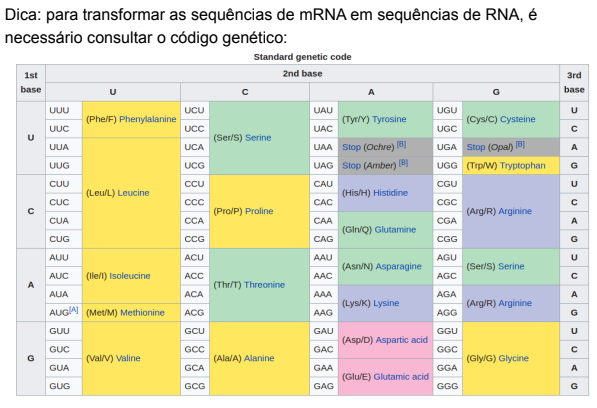

In [6]:
tabela = {
  "UUU":"F", "UUC":"F", "UUA":"L", "UUG":"L",
  "UCU":"S", "UCC":"S", "UCA":"S", "UCG":"S",
  "UAU":"Y", "UAC":"Y", "UAA":"STOP", "UAG":"STOP",
  "UGU":"C", "UGC":"C", "UGA":"STOP", "UGG":"W",
  "CUU":"L", "CUC":"L", "CUA":"L", "CUG":"L",
  "CCU":"P", "CCC":"P", "CCA":"P", "CCG":"P",
  "CAU":"H", "CAC":"H", "CAA":"Q", "CAG":"Q",
  "CGU":"R", "CGC":"R", "CGA":"R", "CGG":"R",
  "AUU":"I", "AUC":"I", "AUA":"I", "AUG":"M",
  "ACU":"T", "ACC":"T", "ACA":"T", "ACG":"T",
  "AAU":"N", "AAC":"N", "AAA":"K", "AAG":"K",
  "AGU":"S", "AGC":"S", "AGA":"R", "AGG":"R",
  "GUU":"V", "GUC":"V", "GUA":"V", "GUG":"V",
  "GCU":"A", "GCC":"A", "GCA":"A", "GCG":"A",
  "GAU":"D", "GAC":"D", "GAA":"E", "GAG":"E",
  "GGU":"G", "GGC":"G", "GGA":"G", "GGG":"G"
}

filename = "/content/mRNA_toxins.fna"
filenameWrite = 'toxins.faa'


dictSeqs = {}

with open(filename) as fp:
    for linha in fp:
      if(linha[0] == '>'):
        header = linha.rstrip()
        dictSeqs[header] = ''
      else:
        linha.rstrip()
        dictSeqs[header] = dictSeqs[header] + linha.replace('\n','')

for i in dictSeqs.keys():
  saida = ''
  for j in range(0,len(dictSeqs[i]),3):
    if(j+3 >= len(dictSeqs[i]) ):
        break
    aminoacido = tabela[dictSeqs[i][j:j+3]]
    if(aminoacido != 'STOP'):
     saida += aminoacido
    else:
     saida += '*'
  dictSeqs[i] = saida
  with open(filenameWrite, 'a') as writer:
    writer.write(i+'\n'+dictSeqs[i]+'\n')


#4 -
Para ajudar seu colega, crie um programa que receba os três arquivos 1.fa,
2.fa e 3.fa gerados pelo proteinOrtho e gere um arquivo fasta (.fa) para cada
espécie encontrada nestes arquivos de ortólogos. Cada arquivo gerado deve ser
nomeado com o nome da espécie e extensão .fa (exemplo: Kluyveromyces
_lactis.fa) e deve conter todos os genes deste organismo encontrados nos arquivos
de entrada (1.fa, 2.fa e 3.fa).

In [ ]:
def inverter(txt):
  return txt[::-1]

import re

queryName = re.compile('\[.*\]')

#Leitura de um Arquivo
filenames = ["/content/1.fa","/content/2.fa","/content/3.fa"]


dictSeqs = {}
for filename in filenames:
  with open(filename) as fp:
      for linha in fp:
        if(linha[0] == '>'):
          header = linha.rstrip()
          matchQueryName = queryName.search(linha)
          if matchQueryName:
            start = matchQueryName.start()
            end = matchQueryName.end()
            nameFound = linha[start:end]
            header = nameFound.replace(' ','_').replace('[','').replace(']','') + '.fa'
            if header in set(dictSeqs.keys()):
              dictSeqs[header] = dictSeqs[header] + '\n'
            else:
              dictSeqs[header] = ''
        else:
          linha.rstrip()
          dictSeqs[header] = dictSeqs[header] + linha.replace('\n','')

for i in dictSeqs.keys():
    with open(i, 'w') as writer:
      writer.write(dictSeqs[i])

